## Loading Packages

In [1]:

import os, shutil

import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt # plotting library
%matplotlib inline
matplotlib.get_backend()

'module://matplotlib_inline.backend_inline'

In [2]:
if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
   print("No GPU installed - You are as slow as a High-End Windows PC")


No GPU installed - You are as slow as a High-End Windows PC


## Data Preparation

In [3]:
new_folders = False

# Odrner für die Originaldaten
original_dataset_dir = 'dataset/original_data'

# Ordner für die Trainings, Validierungs und Testdaten
base_dir = 'dataset/dataset'
#os.mkdir(base_dir)

#creates train-, validation- and test-folder
train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

# creates a cat and a dog folder in the train folder
train_y_dir = os.path.join(train_dir, 'y')
#os.mkdir(train_y_dir)
train_n_dir = os.path.join(train_dir, 'n')
#os.mkdir(train_n_dir)

# creates a cat and a dog folder in the validation folder
validation_y_dir = os.path.join(validation_dir, 'y')
#os.mkdir(validation_y_dir)
validation_n_dir = os.path.join(validation_dir, 'n')
#os.mkdir(validation_n_dir)

# creates a cat and a dog folder in the test folder
test_y_dir = os.path.join(test_dir, 'y')
#os.mkdir(test_y_dir)
test_n_dir = os.path.join(test_dir, 'n')
#os.mkdir(test_n_dir)

if new_folders == True:
    os.mkdir(base_dir)
    os.mkdir(train_dir)
    os.mkdir(validation_dir)
    os.mkdir(test_dir)
    os.mkdir(train_y_dir)
    os.mkdir(train_n_dir)
    os.mkdir(validation_y_dir)
    os.mkdir(validation_n_dir)
    os.mkdir(test_y_dir)
    os.mkdir(test_n_dir)

In [4]:
# read size of the dataset folders

print('total y images:', len(os.listdir('dataset/original_data/y')))
print('total n images:', len(os.listdir('dataset/original_data/n')))

total y images: 172
total n images: 246


In [5]:
# calculates the number of images for train, validation and test
train_size = 0.6
validation_size = 0.2
test_size = 0.2

# calculates the number of images for train, validation and test
train_y_size = int(len(os.listdir('dataset/original_data/y')) * train_size)
train_n_size = int(len(os.listdir('dataset/original_data/n')) * train_size)

validation_y_size = int(len(os.listdir('dataset/original_data/y')) * validation_size)
validation_n_size = int(len(os.listdir('dataset/original_data/n')) * validation_size)

test_y_size = int(len(os.listdir('dataset/original_data/y')) * test_size)
test_n_size = int(len(os.listdir('dataset/original_data/n')) * test_size)

train_y_size

103

In [6]:
renamed = True
y_dir = 'dataset/original_data/y/'
n_dir = 'dataset/original_data/n/'
if renamed == False:
    # change name of the images in the dataset folder
    # nur einmal Ausführen!



    i = 0
    for filename in os.listdir(y_dir):
        os.rename(y_dir + filename, y_dir + 'y.' + str(i) + '.jpg')
        i = i + 1

    y = 0
    for filename in os.listdir(n_dir):
        os.rename(n_dir + filename, n_dir + 'n.' + str(y) + '.jpg')
        y = y + 1
        
    

In [7]:
# copy train_y_size images from the original dataset to the train_y_dir
fnames = ['y.{}.jpg'.format(i) for i in range(train_y_size)]
for fname in fnames:
    src = os.path.join(y_dir, fname)
    dst = os.path.join(train_y_dir, fname)
    shutil.copyfile(src, dst)

# copy train_n_size images from the original dataset to the train_n_dir
fnames = ['n.{}.jpg'.format(i) for i in range(train_n_size)]
for fname in fnames:
    src = os.path.join(n_dir, fname)
    dst = os.path.join(train_n_dir, fname)
    shutil.copyfile(src, dst)

# copy validation_y_size images from the original dataset to the validation_y_dir
fnames = ['y.{}.jpg'.format(i) for i in range(train_y_size, train_y_size + validation_y_size)]
for fname in fnames:
    src = os.path.join(y_dir, fname)
    dst = os.path.join(validation_y_dir, fname)
    shutil.copyfile(src, dst)

# copy validation_n_size images from the original dataset to the validation_n_dir
fnames = ['n.{}.jpg'.format(i) for i in range(train_n_size, train_n_size + validation_n_size)]
for fname in fnames:
    src = os.path.join(n_dir, fname)
    dst = os.path.join(validation_n_dir, fname)
    shutil.copyfile(src, dst)

# copy test_y_size images from the original dataset to the test_y_dir
fnames = ['y.{}.jpg'.format(i) for i in range(train_y_size + validation_y_size, train_y_size + validation_y_size + test_y_size)]
for fname in fnames:
    src = os.path.join(y_dir, fname)
    dst = os.path.join(test_y_dir, fname)
    shutil.copyfile(src, dst)

# copy test_n_size images from the original dataset to the test_n_dir
fnames = ['n.{}.jpg'.format(i) for i in range(train_n_size + validation_n_size, train_n_size + validation_n_size + test_n_size)]
for fname in fnames:
    src = os.path.join(n_dir, fname)
    dst = os.path.join(test_n_dir, fname)
    shutil.copyfile(src, dst)



## Control of the data

In [8]:
print('total training y images:', len(os.listdir(train_y_dir)))
print('total training n images:', len(os.listdir(train_n_dir)))
print('total validation y images:', len(os.listdir(validation_y_dir)))
print('total validation n images:', len(os.listdir(validation_n_dir)))
print('total test y images:', len(os.listdir(test_y_dir)))
print('total test n images:', len(os.listdir(test_n_dir)))

total training y images: 103
total training n images: 147
total validation y images: 51
total validation n images: 70
total test y images: 51
total test n images: 70


## Data Gathering with Generator


In [9]:
# without Data Augmentation

train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255,)


test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 1,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 1,
    class_mode = 'binary'
)

Found 250 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


Look at the output of one of these generators.

In [10]:
'''
for data_batch, labels_batch in train_generator:
    print('data_batch shape:', data_batch.shape)
    print('labels batch shape', labels_batch.shape)
    break
'''

"\nfor data_batch, labels_batch in train_generator:\n    print('data_batch shape:', data_batch.shape)\n    print('labels batch shape', labels_batch.shape)\n    break\n"

## Modeling
Nun sollen Sie ein Modell für diese Daten bauen.

In [11]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')

In [12]:
#create a base_line model

base_model = keras.models.Sequential()

base_model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
base_model.add(keras.layers.MaxPooling2D((2,2)))

base_model.add(tf.keras.layers.Flatten())
base_model.add(keras.layers.Dense(256, activation='relu'))
base_model.add(keras.layers.Dense(1, activation='sigmoid'))
base_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 256)               44859648  
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 44,860,801
Trainable params: 44,860,801
Non-trainable params: 0
____________________________________________

In [13]:
base_model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.RMSprop(lr=1e-4), metrics=['acc'])

history = base_model.fit_generator(
    train_generator,
    steps_per_epoch = 25,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = 50,
    callbacks=[early_stopping]
)


Epoch 1/25


c:\Users\benit\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\benit\AppData\Local\Temp\ipykernel_18368\3002109763.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = base_model.fit_generator(


25/25 [==============================] - 12s 464ms/step - loss: 1.7477 - acc: 0.4000 - val_loss: 0.8043 - val_acc: 0.3800
Epoch 2/25
25/25 [==============================] - 11s 455ms/step - loss: 0.6460 - acc: 0.6400 - val_loss: 0.6483 - val_acc: 0.5600
Epoch 3/25
25/25 [==============================] - 12s 474ms/step - loss: 0.7642 - acc: 0.6000 - val_loss: 0.7245 - val_acc: 0.6000
Epoch 4/25
25/25 [==============================] - ETA: 0s - loss: 0.5024 - acc: 0.8000

KeyboardInterrupt: 

In [ ]:
#plot history

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(15,5))
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.savefig('acc.png')
plt.show()


: 

: 

# Pretrainned Model

In [ ]:
from tensorflow.keras.applications import VGG16

# Load pre-trained VGG16 model without the top layers (include_top=False)
pr_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the pre-trained layers to prevent them from being updated during training
pr_model.trainable = False

# Create a new model by adding your own classifier on top of the pre-trained base
model = keras.models.Sequential()
model.add(pr_model)
model.add(keras.layers.GlobalAveragePooling2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.RMSprop(lr=1e-4), metrics=['acc'])

# Train the model
history1 = model.fit_generator(
    train_generator,
    steps_per_epoch=25,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=50, 
    callbacks=[early_stopping]
)




Epoch 1/10


C:\Users\benit\AppData\Local\Temp\ipykernel_27816\1199323966.py:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1 = model.fit_generator(


100/100 [==============================] - 17s 160ms/step - loss: 0.5679 - acc: 0.7800 - val_loss: 0.5558 - val_acc: 0.7400
Epoch 2/10
100/100 [==============================] - 17s 167ms/step - loss: 0.3896 - acc: 0.8200 - val_loss: 0.8274 - val_acc: 0.6400
Epoch 3/10
100/100 [==============================] - 16s 162ms/step - loss: 0.3244 - acc: 0.8500 - val_loss: 0.5542 - val_acc: 0.7800
Epoch 4/10
100/100 [==============================] - 20s 195ms/step - loss: 0.2553 - acc: 0.9000 - val_loss: 0.8221 - val_acc: 0.7000
Epoch 5/10
100/100 [==============================] - 17s 174ms/step - loss: 0.2806 - acc: 0.9100 - val_loss: 0.8610 - val_acc: 0.7200
Epoch 6/10
100/100 [==============================] - 15s 150ms/step - loss: 0.2069 - acc: 0.9000 - val_loss: 0.6650 - val_acc: 0.7400
Epoch 7/10
100/100 [==============================] - 16s 156ms/step - loss: 0.1939 - acc: 0.9400 - val_loss: 0.7805 - val_acc: 0.7800
Epoch 8/10
100/100 [==============================] - 14s 139ms/st

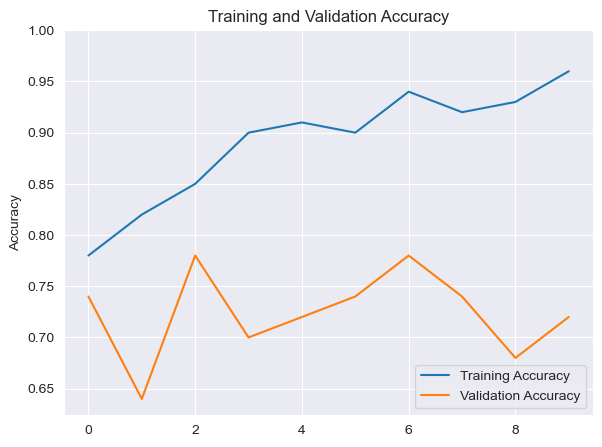

In [ ]:
#plot history

acc = history1.history['acc']
val_acc = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.savefig('acc_pretrained.png')
plt.show()


In [ ]:
model = tf.keras.models.Sequential()

# 1st convolutional layer
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,150,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.2))

# 2nd convolutional layer
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.2))

# 3rd convolutional layer
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.2))

# FFNN
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 batch_normalization_4 (Batc  (None, 148, 148, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_5 (Batc  (None, 72, 72, 64)      

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
history2 = model.fit(train_generator, epochs=25, validation_data=validation_generator, callbacks=[early_stopping])

In [ ]:
#plot history

acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

plt.figure(figsize=(15,5))
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.savefig('acc_model2.png')
plt.show()


KeyError: 'accuracy'

<Figure size 1000x500 with 0 Axes>

In [ ]:
# test the model
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

test_loss, test_acc = model.evaluate(test_generator)
print('test acc:', test_acc)


Found 358 images belonging to 2 classes.
18/18 [==============================] - 11s 615ms/step - loss: 1.1475 - accuracy: 0.7207
test acc: 0.7206704020500183
